In [1]:
import pandas as pd
from pandas import Series, DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
# get titatic & Test CSV files as a dataframe

titanic_df = pd.read_csv("traindata.csv", dtype={"Age": np.float64},)
test_df = pd.read_csv("testdata.csv", dtype={"Age": np.float64},)


In [3]:
titanic_df.info()

print "--------------"

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417

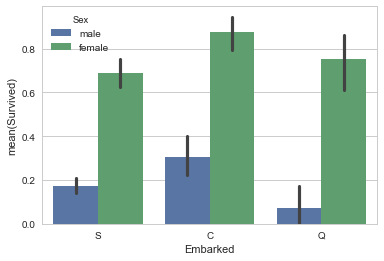

In [4]:
sns.barplot(x='Embarked', y='Survived', hue= 'Sex', data= titanic_df)

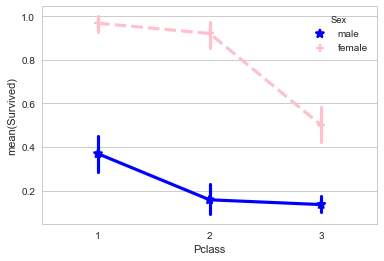

In [5]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data= titanic_df,
             palette={"male": "blue", "female": "pink"},
             markers= ["*", "+"], linestyles= ["-", "--"]);

Tranforming Features

1. Drop name, Ticket, Cabin

2. Fare:  
    - Fill missing fares
    - Place fare into quartile bins 

3. Age: 
    - get average and std
    - generate random numbers between average - std & mean - std
    - Fill NaN values in age column w/ random numbers generated 
    - Create age groups 


In [6]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df["Fare"].fillna(test_df['Fare'].median(), inplace=True)

titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare'] = test_df['Fare'].astype(int)


In [8]:
# create fare bins

#def simplify_fares(titanic_df):
#   titanic_df.Fare = df.Fare.fillna(-.05)
#    bins = (-1,0,8,15,31,1000)
#    group_names = ['Unknown', '1_quartile', '2_quartile','3_quartile','4_quartile']
#    categories = pd.cut(titanic_df.Fare, bins, labels=group_names)
#    titanic_df.Fare = categories
#    return titanic_df

In [9]:
# create fare bins

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-.05)
    bins = (-1,0,8,15,31,1000)
    group_names = ['Unknown', '1_quartile', '2_quartile','3_quartile','4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

In [10]:
# Age analyze NaN values in titanic_df

average_age_titanic = titanic_df["Age"].mean()
std_age_titanic = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

In [11]:
# Age analyze NaN values in test_df

average_age_test = test_df["Age"].mean()
std_age_test = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between mean and std

rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)

rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# Fill NaN values in age columns

titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

/Users/alexisrodich/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/alexisrodich/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [12]:
# Convert from Float to Int 

titanic_df["Age"]= titanic_df['Age'].astype(int)
test_df["Age"] = test_df['Age'].astype(int)
   

In [13]:
                 
# Simplify Age by creating bins 

def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 12, 18,65,120)
    group_names = ['Unknown', 'Child', 'Teenager', ' Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

In [14]:
# Drop columns 

def drop_features(df):
        return df.drop(["Ticket", "Cabin", "Name", "Embarked"], axis=1)
    

In [15]:
# Transform all the things

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_fares(df)
    df = drop_features(df)
    return df

titanic_df = transform_features(titanic_df)
test_df = transform_features(test_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,Adult,1,0,1_quartile
1,2,1,1,female,Adult,1,0,4_quartile
2,3,1,3,female,Adult,0,0,1_quartile
3,4,1,1,female,Adult,1,0,4_quartile
4,5,0,3,male,Adult,0,0,1_quartile


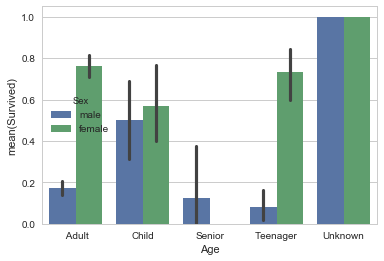

In [16]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=titanic_df);

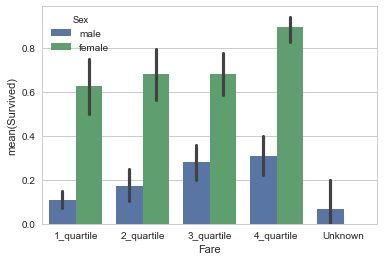

In [17]:
sns.barplot(x="Fare", y="Survived", hue="Sex", data=titanic_df);

Split up the Training Data 

1. Separate the features (X) from the labels (y)

    - X_all: All features save the value we want to predict (survived)
    
    - Y_all: Only the value we want to predict 

2. Use Scikitlearn to shuffle data into for veriables.  Train 80% of data, then test against other 20%


In [18]:
# from sklearn.model_selection import train_test_split

# X_all = titanic_df.drop(['Survived'], axis=1)
# Y_all = titanic_df['Survived']

# num_test = .2

# Define training and testing sets

# X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=num_test, random_state=23)

In [19]:
X_train = titanic_df.drop(['Survived'], axis=1)
Y_train = titanic_df['Survived']
X_test = test_df.drop

In [20]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,Adult,1,0,1_quartile
1,2,1,1,female,Adult,1,0,4_quartile
2,3,1,3,female,Adult,0,0,1_quartile
3,4,1,1,female,Adult,1,0,4_quartile
4,5,0,3,male,Adult,0,0,1_quartile


In [21]:
# Create dummy variables for Fare, Gender, Age

sex = pd.get_dummies(titanic_df['Sex'],drop_first=True)
age = pd.get_dummies(titanic_df['Age'],drop_first=True)
fare = pd.get_dummies(titanic_df['Fare'],drop_first=True)

In [22]:
titanic_df.drop(['Sex','Age','Fare'],axis=1,inplace=True)

In [23]:
titanic_df = pd.concat([titanic_df,sex,age,fare],axis=1)

In [24]:
titanic_df.sample(10)

,PassengerId,Survived,Pclass,SibSp,Parch,male,Child,Senior,Teenager,Unknown,2_quartile,3_quartile,4_quartile,Unknown
340,341,1,2,1,1,1,1,0,0,0,0,1,0,0
224,225,1,1,1,0,1,0,0,0,0,0,0,1,0
393,394,1,1,1,0,0,0,0,0,0,0,0,1,0
448,449,1,3,2,1,0,1,0,0,0,0,1,0,0
587,588,1,1,1,1,1,0,0,0,0,0,0,1,0
740,741,1,1,0,0,1,0,0,1,0,0,1,0,0
792,793,0,3,8,2,0,0,0,0,0,0,0,1,0
874,875,1,2,1,0,0,0,0,0,0,0,1,0,0
127,128,1,3,0,0,1,0,0,0,0,0,0,0,0
832,833,0,3,0,0,1,0,0,0,0,0,0,0,0


In [25]:
#import and run Train Test Split

from sklearn.model_selection import train_test_split

X_all = titanic_df.drop('Survived', axis=1)
Y_all = titanic_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(titanic_df.drop('Survived',axis=1), 
                                                    titanic_df['Survived'], test_size=0.30, 
                                                    random_state=101)

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
predictions = logmodel.predict(x_test)

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.89      0.82       154
          1       0.81      0.63      0.71       114

avg / total       0.78      0.78      0.77       268



Random Forests

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=6, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [31]:
predictions = clf.predict(x_test)
print (accuracy_score(y_test, predictions))

0.772388059701


Validate with KFold

In [32]:
from sklearn.cross_validation import KFold

def run_kfold(clf):
    kf = KFold(891, n_folds=10)
    outcomes = []
    fold = 0
    for titanic_df, test_df in kf:
        fold += 1
        x_train, x_test = X_all.values[titanic_df], X_all.values[test_df]
        y_train, y_test = Y_all.values[titanic_df], Y_all.values[test_df]
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold,accuracy))
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome))

run_kfold(clf)

Fold 1 accuracy: 0.733333333333
Fold 2 accuracy: 0.820224719101
Fold 3 accuracy: 0.76404494382


/Users/alexisrodich/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Fold 4 accuracy: 0.842696629213
Fold 5 accuracy: 0.797752808989
Fold 6 accuracy: 0.820224719101
Fold 7 accuracy: 0.808988764045
Fold 8 accuracy: 0.775280898876
Fold 9 accuracy: 0.865168539326
Fold 10 accuracy: 0.797752808989
Mean Accuracy: 0.802546816479


In [33]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
gaussian.score(x_train, y_train)

0.7817014446227929

In [37]:
# get correlation coefficient for each feature using log reg

coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = pd.Series(logmodel.coef_[0])

# preview 
coeff_df

,Features,Coefficient Estimate
0,Survived,0.000369
1,Pclass,-0.522847
2,SibSp,-0.358636
3,Parch,-0.225539
4,male,-2.621759
5,Child,0.671984
6,Senior,-0.701961
7,Teenager,-0.141782
8,Unknown,2.164434
9,2_quartile,0.046241
